In [1]:
import os
import sys
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import pandas as pd
from tqdm import tqdm
import numpy as np
from scipy.stats import pearsonr, spearmanr
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from importlib import reload
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

In [2]:
import os
import sys
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
import calplot

In [3]:
sys.path.append("../../src")
import main

ModuleNotFoundError: No module named 'geopandas'

In [5]:
year = 'year'
var = 'BuAre_sum'
radius = 200

In [6]:
stats_dict = pd.read_csv(f'/Users/lisawink/Documents/paper1/data/processed_data/diurnal/all_year/{year,var,radius}.csv') 

In [8]:
stats_dict['Time'] = pd.to_datetime(stats_dict['Time'])

In [41]:
# select all hours at 13:00
stats_dict_13 = stats_dict[stats_dict['Time'].dt.hour == 13]
stats_dict_03 = stats_dict[stats_dict['Time'].dt.hour == 3]

In [42]:
stats_dict_13 = stats_dict_13.drop(columns=['Unnamed: 0','Parameter.1'])
stats_dict_03 = stats_dict_03.drop(columns=['Unnamed: 0','Parameter.1'])

In [43]:
stats_dict_03

,Parameter,Pearson Correlation,Pearson p-value,Spearman Correlation,Spearman p-value,Mutual Information,Time
3,BuAre_sum,0.689098,0.000018,0.574627,0.000723,0.098280,2022-09-01 03:00:00+00:00
27,BuAre_sum,0.443715,0.012407,0.452419,0.010606,0.207263,2022-09-02 03:00:00+00:00
51,BuAre_sum,0.497936,0.004365,0.390401,0.029906,0.197485,2022-09-03 03:00:00+00:00
75,BuAre_sum,0.665742,0.000044,0.587358,0.000513,0.158143,2022-09-04 03:00:00+00:00
99,BuAre_sum,0.619386,0.000203,0.508017,0.003527,0.274064,2022-09-05 03:00:00+00:00
...,...,...,...,...,...,...,...
8667,BuAre_sum,0.651500,0.000072,0.645623,0.000088,0.158255,2023-08-28 03:00:00+00:00
8691,BuAre_sum,0.363534,0.044403,0.418229,0.019212,0.000000,2023-08-29 03:00:00+00:00
8715,BuAre_sum,0.413855,0.020645,0.417625,0.019405,0.000000,2023-08-30 03:00:00+00:00
8739,BuAre_sum,0.516734,0.002918,0.574108,0.000732,0.179943,2023-08-31 03:00:00+00:00


In [44]:
stats_dict_13.index = stats_dict_13['Time'].dt.date
stats_dict_03.index = stats_dict_03['Time'].dt.date

In [13]:
stats_dict_13[stats_dict_13['Time'].dt.year == 2023]['Spearman Correlation']

Time
2023-01-01   -0.196371
2023-01-02    0.195058
2023-01-03   -0.276467
2023-01-04    0.327446
2023-01-05   -0.142555
                ...   
2023-08-27    0.324897
2023-08-28    0.147610
2023-08-29   -0.097187
2023-08-30   -0.067547
2023-08-31   -0.084896
Name: Spearman Correlation, Length: 243, dtype: float64

In [45]:
stats_dict_13.index = pd.to_datetime(stats_dict_13.index)
stats_dict_03.index = pd.to_datetime(stats_dict_03.index)

# Day

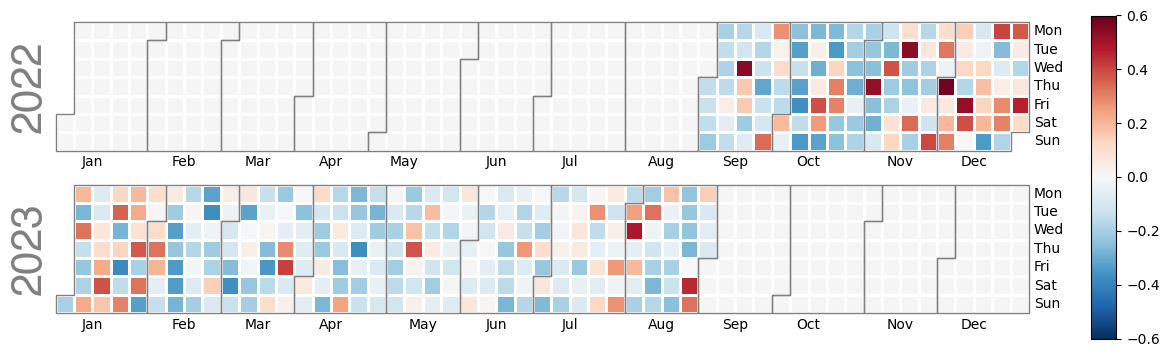

In [69]:
calplot.calplot(stats_dict_13['Spearman Correlation'], cmap='RdBu_r',vmin=-0.6,vmax=0.6)
plt.savefig('/Users/lisawink/Documents/paper1/figures/temperature_building_area_spearman_13.png',bbox_inches='tight')

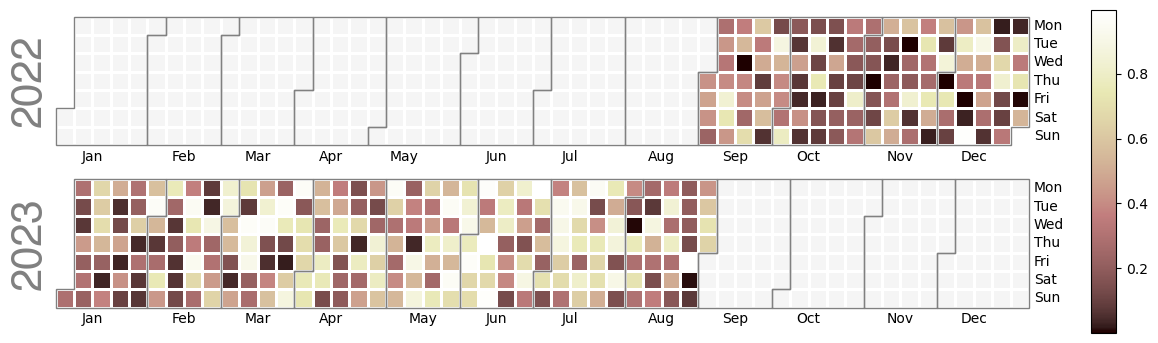

In [70]:
calplot.calplot(stats_dict_13['Spearman p-value'], cmap='pink')
plt.savefig('/Users/lisawink/Documents/paper1/figures/temperature_building_area_spearman_pvalue_13.png',bbox_inches='tight')

# Night

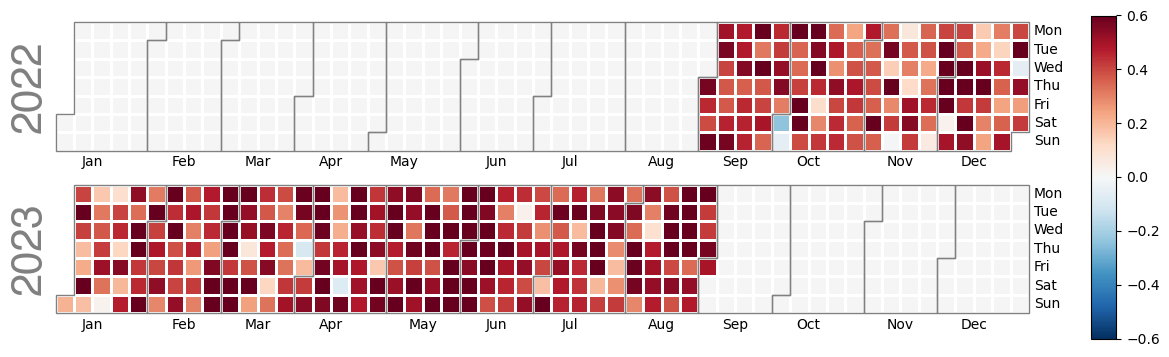

In [71]:
calplot.calplot(stats_dict_03['Spearman Correlation'], cmap='RdBu_r',vmin=-0.6,vmax=0.6)
plt.savefig('/Users/lisawink/Documents/paper1/figures/temperature_building_area_spearman_03.png',bbox_inches='tight')

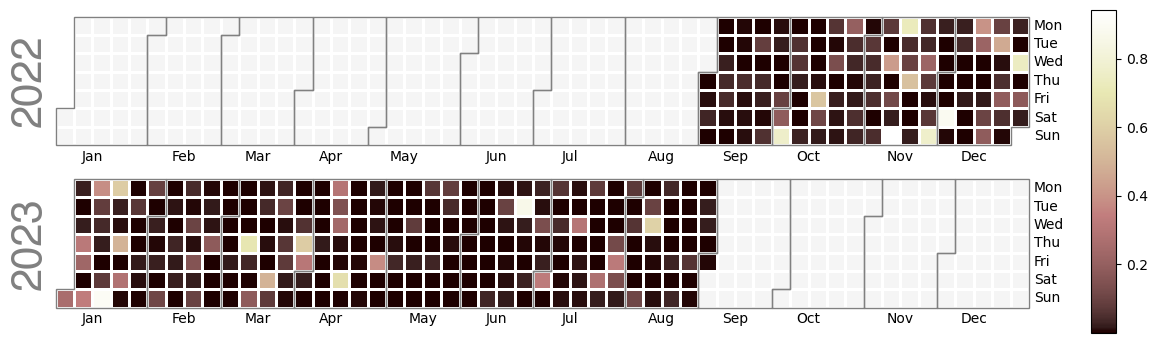

In [72]:
calplot.calplot(stats_dict_03['Spearman p-value'], cmap='pink')
plt.savefig('/Users/lisawink/Documents/paper1/figures/temperature_building_area_spearman_03_pvalue.png',bbox_inches='tight')

In [85]:
stats_dict_13['Spearman p-value'].values.tolist()

[0.4205794798521948,
 0.4726835045689856,
 0.4222875636691714,
 0.2339574031441106,
 0.2911731367955561,
 0.4339135839797107,
 0.3225886229307129,
 0.400637768715729,
 0.8345083003596447,
 0.7383706087773572,
 0.4346033734489133,
 0.3612515851458483,
 0.5438365935199192,
 0.0016875737926517,
 0.3857502097427987,
 0.4023880359816805,
 0.252939409006887,
 0.6923830969817162,
 0.6090792182133721,
 0.3440888652475268,
 0.4959347293416866,
 0.0856923756121171,
 0.4679856582832257,
 0.5647883818769709,
 0.0605321730089453,
 0.1327258206859358,
 0.8818083608712953,
 0.5329409156540019,
 0.3944216819314732,
 0.3981835088812182,
 0.305657634973386,
 0.7859979498841676,
 0.185195692068128,
 0.0678220018329775,
 0.4634034557016268,
 0.0739907699488713,
 0.0421392130541501,
 0.414241592186694,
 0.0594103040634372,
 0.1431042490000317,
 0.8446017610987495,
 0.1102920290571627,
 0.7465060887978539,
 0.0316057999868965,
 0.1671431166953249,
 0.079508544518575,
 0.1494259021480824,
 0.0579334342421997

In [94]:
[1,1,1] +data[:4]

[1,
 1,
 1,
 0.4205794798521948,
 0.4726835045689856,
 0.4222875636691714,
 0.2339574031441106]

In [95]:
data = stats_dict_13['Spearman p-value'].values.tolist()  # Replace with your actual list
subdivided = []



# First group: 4 elements
subdivided.append([1,1,1]+data[:4])

# Next 16 groups: 7 elements each
start = 4
for _ in range(16):
    subdivided.append(data[start:start + 7])
    start += 7

# 17th group: 6 elements
subdivided.append(data[start:start + 6]+[1])
start += 6



# 18th group: 1 element
subdivided.append([1,1,1,1,1,1]+data[start:start + 1])
start += 1

# Remaining groups: 7 elements each, except the last group (4 elements)
while start < len(data) - 4:
    subdivided.append(data[start:start + 7])
    start += 7

# Last group: 4 elements
subdivided.append(data[start:]+[1,1,1])


# Print or use the subdivided list
print(subdivided)

[[1, 1, 1, 0.4205794798521948, 0.4726835045689856, 0.4222875636691714, 0.2339574031441106], [0.2911731367955561, 0.4339135839797107, 0.3225886229307129, 0.400637768715729, 0.8345083003596447, 0.7383706087773572, 0.4346033734489133], [0.3612515851458483, 0.5438365935199192, 0.0016875737926517, 0.3857502097427987, 0.4023880359816805, 0.252939409006887, 0.6923830969817162], [0.6090792182133721, 0.3440888652475268, 0.4959347293416866, 0.0856923756121171, 0.4679856582832257, 0.5647883818769709, 0.0605321730089453], [0.1327258206859358, 0.8818083608712953, 0.5329409156540019, 0.3944216819314732, 0.3981835088812182, 0.305657634973386, 0.7859979498841676], [0.185195692068128, 0.0678220018329775, 0.4634034557016268, 0.0739907699488713, 0.0421392130541501, 0.414241592186694, 0.0594103040634372], [0.1431042490000317, 0.8446017610987495, 0.1102920290571627, 0.7465060887978539, 0.0316057999868965, 0.1671431166953249, 0.079508544518575], [0.1494259021480824, 0.0579334342421997, 0.4793476991574048, 0

In [96]:
np.array(subdivided)

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 4.20579480e-01,
        4.72683505e-01, 4.22287564e-01, 2.33957403e-01],
       [2.91173137e-01, 4.33913584e-01, 3.22588623e-01, 4.00637769e-01,
        8.34508300e-01, 7.38370609e-01, 4.34603373e-01],
       [3.61251585e-01, 5.43836594e-01, 1.68757379e-03, 3.85750210e-01,
        4.02388036e-01, 2.52939409e-01, 6.92383097e-01],
       [6.09079218e-01, 3.44088865e-01, 4.95934729e-01, 8.56923756e-02,
        4.67985658e-01, 5.64788382e-01, 6.05321730e-02],
       [1.32725821e-01, 8.81808361e-01, 5.32940916e-01, 3.94421682e-01,
        3.98183509e-01, 3.05657635e-01, 7.85997950e-01],
       [1.85195692e-01, 6.78220018e-02, 4.63403456e-01, 7.39907699e-02,
        4.21392131e-02, 4.14241592e-01, 5.94103041e-02],
       [1.43104249e-01, 8.44601761e-01, 1.10292029e-01, 7.46506089e-01,
        3.16058000e-02, 1.67143117e-01, 7.95085445e-02],
       [1.49425902e-01, 5.79334342e-02, 4.79347699e-01, 9.94164508e-02,
        1.03200246e-01, 2

In [132]:
plot_data.data

array([[           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
                   nan,            nan,            nan, 2.33957403e-01,
        4.34603373e-01, 6.92383097e-01, 6.05321730e-02, 7.85997950e-01,
        5.94103041e-02, 7.95085445e-02, 1.83749348e-01, 3.13765289e-01,
        6.04277200e-01, 4.99170322e-01, 2.86133681e-01, 2.65508982e-02,
        1.01054049e-01, 9.81093765e-01, 6.04806925e-02, 3.31856260e-01,
                   nan],
       [           nan,            nan,

In [143]:
# import berlin colormap from matplotlib
import matplotlib.pyplot as plt

cmap = plt.get_cmap('berlin')


ValueError: 'berlin' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [147]:
import matplotlib

In [148]:
matplotlib.__version__

'3.8.3'

(<Figure size 1250x340 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

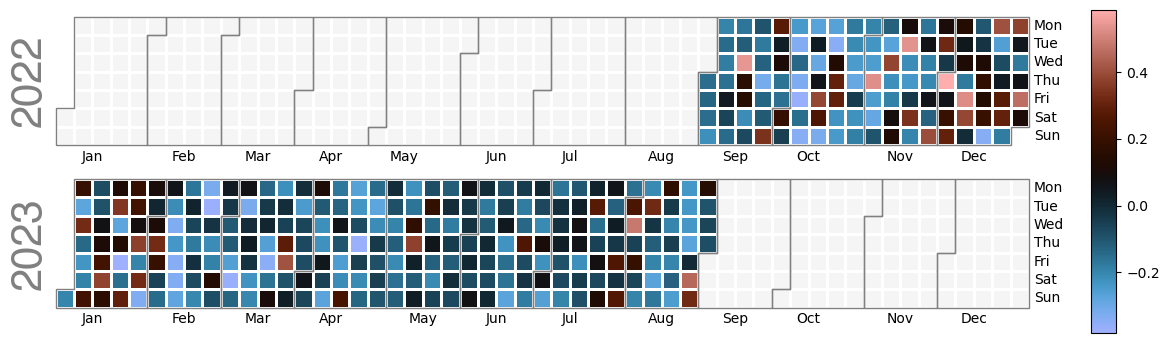

In [30]:
calplot.calplot(stats_dict_13['Spearman Correlation'], cmap='berlin')

(<Figure size 1250x340 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

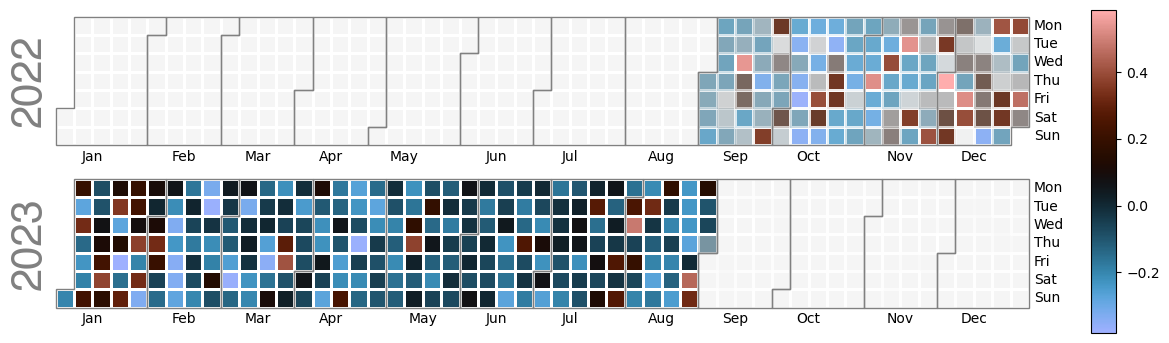

In [31]:
calplot.calplot(stats_dict_13['Spearman Correlation'], cmap='berlin',alpha=(1-np.nan_to_num(plot_data.data)))

(<Figure size 1250x340 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

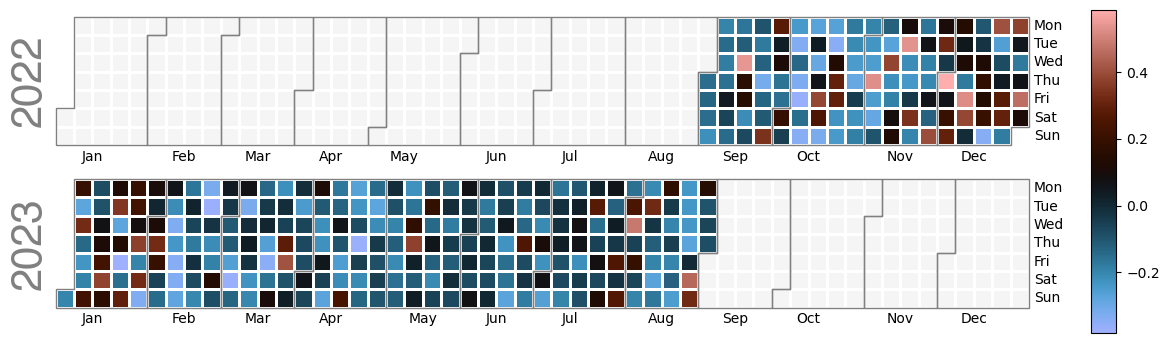

In [40]:
calplot.calplot(stats_dict_13['Spearman Correlation'], cmap='berlin')

(<Figure size 1250x340 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

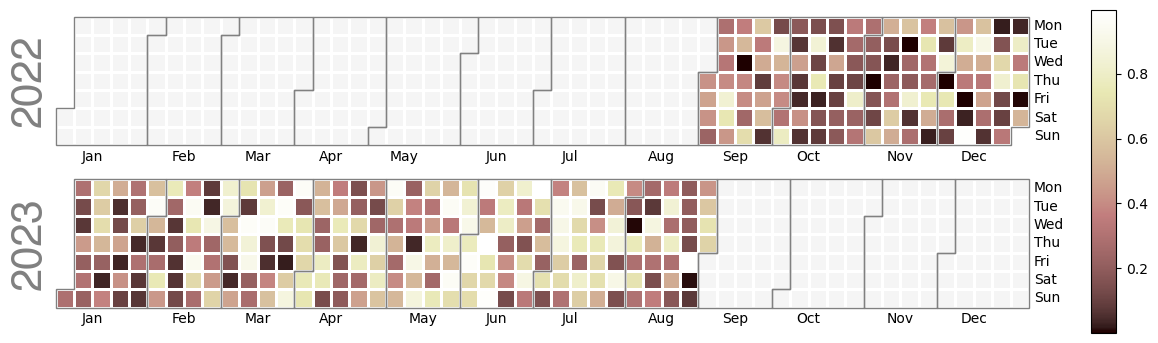

In [39]:
calplot.calplot(stats_dict_13['Spearman p-value'], cmap='pink')

(<Figure size 1250x340 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

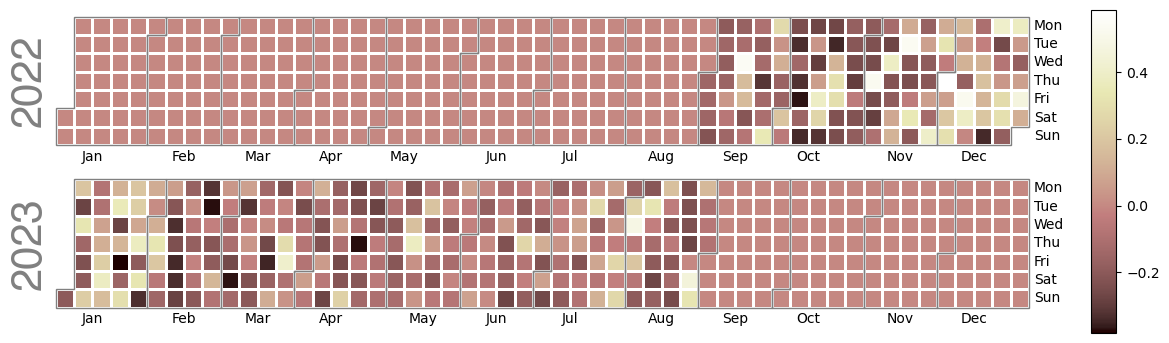

In [65]:
calplot.calplot(df['Spearman Correlation'], cmap='pink')

In [101]:
import calendar
import datetime
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

from matplotlib.colors import ColorConverter, ListedColormap
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

def yearplot(data, year=None, how='sum',
             vmin=None, vmax=None,
             cmap='viridis', fillcolor='whitesmoke',
             linewidth=1, linecolor=None, edgecolor='gray',
             daylabels=calendar.day_abbr[:], dayticks=True,
             dropzero=None,
             textformat=None, textfiller='', textcolor='black',
             monthlabels=calendar.month_abbr[1:], monthlabeloffset=15,
             monthticks=True,
             ax=None, **kwargs):
    """
    Plot one year from a timeseries as a calendar heatmap.

    Parameters
    ----------
    data : Series
        Data for the plot. Must be indexed by a DatetimeIndex.
    year : integer
        Only data indexed by this year will be plotted. If `None`, the first
        year for which there is data will be plotted.
    how : string
        Method for resampling data by day. If `None`, assume data is already
        sampled by day and don't resample. Otherwise, this is passed to Pandas
        `Series.resample`.
    vmin, vmax : floats
        Values to anchor the colormap. If `None`, min and max are used after
        resampling data by day.
    cmap : matplotlib colormap name or object
        The mapping from data values to color space.
    fillcolor : matplotlib color
        Color to use for days without data.
    linewidth : float
        Width of the lines that will divide each day.
    linecolor : color
        Color of the lines that will divide each day. If `None`, the axes
        background color is used, or 'white' if it is transparent.
    daylabels : list
        Strings to use as labels for days, must be of length 7.
    dayticks : list or int or bool
        If `True`, label all days. If `False`, don't label days. If a list,
        only label days with these indices. If an integer, label every n day.
    dropzero : bool
        If `True`, don't fill a color for days with a zero value.
    monthlabels : list
        Strings to use as labels for months, must be of length 12.
    monthlabeloffset : integer
        Day offset for labels for months to adjust horizontal alignment.
    monthticks : list or int or bool
        If `True`, label all months. If `False`, don't label months. If a
        list, only label months with these indices. If an integer, label every
        n month.
    edgecolor : color
        Color of the lines that will divide months.
    textformat : string
        Text format string for grid cell text
    textfiller : string
        Fallback text for grid cell text for cells with no data
    textcolor : color
        Color of the grid cell text
    ax : matplotlib Axes
        Axes in which to draw the plot, otherwise use the currently-active
        Axes.
    kwargs : other keyword arguments
        All other keyword arguments are passed to matplotlib `ax.pcolormesh`.

    Returns
    -------
    ax : matplotlib Axes
        Axes object with the calendar heatmap.

    """

    if year is None:
        year = data.index.sort_values()[0].year

    if how is None:
        # Assume already sampled by day.
        by_day = data
    else:
        # Sample by day.
        by_day = data.resample('D').agg(how)

    # Default to dropping zero values for a series with over 50% of rows being zero.
    if not (dropzero is False) and (by_day[by_day == 0].count() > 0.5 * by_day.count()):
        dropzero = True

    if dropzero:
        by_day = by_day.replace({0: np.nan}).dropna()

    # Min and max per day.
    if vmin is None:
        vmin = by_day.min()
    if vmax is None:
        vmax = by_day.max()

    if ax is None:
        ax = plt.gca()

    if linecolor is None:
        # Unfortunately, linecolor cannot be transparent, as it is drawn on
        # top of the heatmap cells. Therefore it is only possible to mimic
        # transparent lines by setting them to the axes background color. This
        # of course won't work when the axes itself has a transparent
        # background so in that case we default to white which will usually be
        # the figure or canvas background color.
        linecolor = ax.get_facecolor()
        if ColorConverter().to_rgba(linecolor)[-1] == 0:
            linecolor = 'white'

    # Filter on year.
    try:
      # could be empty due to `dropzero`
      by_day = by_day[str(year)]
    except KeyError:
      pass

    # Add missing days.
    by_day = by_day.reindex(
        pd.date_range(start=str(year), end=str(year + 1),
                      freq='D', tz=by_day.index.tzinfo)[:-1])

    # Create data frame we can pivot later.
    by_day = pd.DataFrame({'data': by_day,
                           'fill': 1,
                           'day': by_day.index.dayofweek,
                           'week': by_day.index.isocalendar().week})

    # There may be some days assigned to previous year's last week or
    # next year's first week. We create new week numbers for them so
    # the ordering stays intact and week/day pairs unique.
    by_day.loc[(by_day.index.month == 1) & (by_day.week > 50), 'week'] = 0
    by_day.loc[(by_day.index.month == 12) & (by_day.week < 10), 'week'] \
        = by_day.week.max() + 1

    # Pivot data on day and week and mask NaN days.
    plot_data = by_day.pivot(index='day', columns='week', values='data').values[::-1]
    plot_data = np.ma.masked_where(np.isnan(plot_data), plot_data)

    # Do the same for all days of the year, not just those we have data for.
    fill_data = by_day.pivot(index='day', columns='week', values='fill').values[::-1]
    fill_data = np.ma.masked_where(np.isnan(fill_data), fill_data)

    # Draw heatmap for all days of the year with fill color.
    ax.pcolormesh(fill_data, vmin=0, vmax=1, cmap=ListedColormap([fillcolor]))

    # Draw heatmap.
    kwargs['linewidth'] = linewidth
    kwargs['edgecolors'] = linecolor
    ax.pcolormesh(plot_data, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)

In [22]:
data = stats_dict_13['Spearman p-value']

In [23]:
year=None
how='sum'
dropzero=None
vmin=None
vmax=None
ax=None
linewidth=1
linecolor=None
edgecolor='gray'
cmap='viridis'
fillcolor='whitesmoke'

In [25]:
if year is None:
    year = data.index.sort_values()[0].year

if how is None:
    # Assume already sampled by day.
    by_day = data
else:
    # Sample by day.
    by_day = data.resample('D').agg(how)

# Default to dropping zero values for a series with over 50% of rows being zero.
if not (dropzero is False) and (by_day[by_day == 0].count() > 0.5 * by_day.count()):
    dropzero = True

if dropzero:
    by_day = by_day.replace({0: np.nan}).dropna()

# Min and max per day.
if vmin is None:
    vmin = by_day.min()
if vmax is None:
    vmax = by_day.max()

if ax is None:
    ax = plt.gca()



# Filter on year.
try:
    # could be empty due to `dropzero`
    by_day = by_day[str(year)]
except KeyError:
    pass

# Add missing days.
by_day = by_day.reindex(
    pd.date_range(start=str(year), end=str(year + 1),
                    freq='D', tz=by_day.index.tzinfo)[:-1])

# Create data frame we can pivot later.
by_day = pd.DataFrame({'data': by_day,
                        'fill': 1,
                        'day': by_day.index.dayofweek,
                        'week': by_day.index.isocalendar().week})

# There may be some days assigned to previous year's last week or
# next year's first week. We create new week numbers for them so
# the ordering stays intact and week/day pairs unique.
by_day.loc[(by_day.index.month == 1) & (by_day.week > 50), 'week'] = 0
by_day.loc[(by_day.index.month == 12) & (by_day.week < 10), 'week'] \
    = by_day.week.max() + 1

# Pivot data on day and week and mask NaN days.
plot_data = by_day.pivot(index='day', columns='week', values='data').values[::-1]
plot_data = np.ma.masked_where(np.isnan(plot_data), plot_data)

# Do the same for all days of the year, not just those we have data for.
fill_data = by_day.pivot(index='day', columns='week', values='fill').values[::-1]
fill_data = np.ma.masked_where(np.isnan(fill_data), fill_data)

# Draw heatmap for all days of the year with fill color.
ax.pcolormesh(fill_data, vmin=0, vmax=1, cmap=ListedColormap([fillcolor]))

# Draw heatmap.
#kwargs['linewidth'] = linewidth
#kwargs['edgecolors'] = linecolor
ax.pcolormesh(plot_data, vmin=vmin, vmax=vmax, cmap=cmap)

NameError: name 'ListedColormap' is not defined

In [27]:
fill_data.shape

(7, 53)

In [28]:
plot_data.data.shape

(7, 53)

In [29]:
np.nan_to_num(plot_data.data)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.33957403e-01,
        4.34603373e-01, 6.92383097e-01, 6.05321730e-02, 7.85997950e-01,
        5.94103041e-02, 7.95085445e-02, 1.83749348e-01, 3.13765289e-01,
        6.04277200e-01, 4.99170322e-01, 2.86133681e-01, 2.65508982e-02,
        1.01054049e-01, 9.81093765e-01, 6.04806925e-02, 3.31856260e-01,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00,

In [133]:
np.nan_to_num(plot_data.data)

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.33957403e-01,
        4.34603373e-01, 6.92383097e-01, 6.05321730e-02, 7.85997950e-01,
        5.94103041e-02, 7.95085445e-02, 1.83749348e-01, 3.13765289e-01,
        6.04277200e-01, 4.99170322e-01, 2.86133681e-01, 2.65508982e-02,
        1.01054049e-01, 9.81093765e-01, 6.04806925e-02, 3.31856260e-01,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00,

In [136]:
# replace nan with 0 in plot_data.data
alpha_values = np.nan_to_num(plot_data.data)

In [137]:
1 - alpha_values

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.7660426 , 0.56539663, 0.3076169 , 0.93946783, 0.21400205,
        0.9405897 , 0.92049146, 0.81625065, 0.68623471, 0.3957228 ,
        0.50082968, 0.71386632, 0.9734491 , 0.89894595, 0.01890624,
        0.93951931, 0.66814374, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
   

In [ ]:
# for every value in plot_data.data, 1 - value

alpha_values = 1 - alpha_values